In [31]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [32]:
data = pd.read_csv("wines.csv")
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alkalinity,Magnesium,Total_Phenols,Flavonoids,Stilbenes,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# Question 1

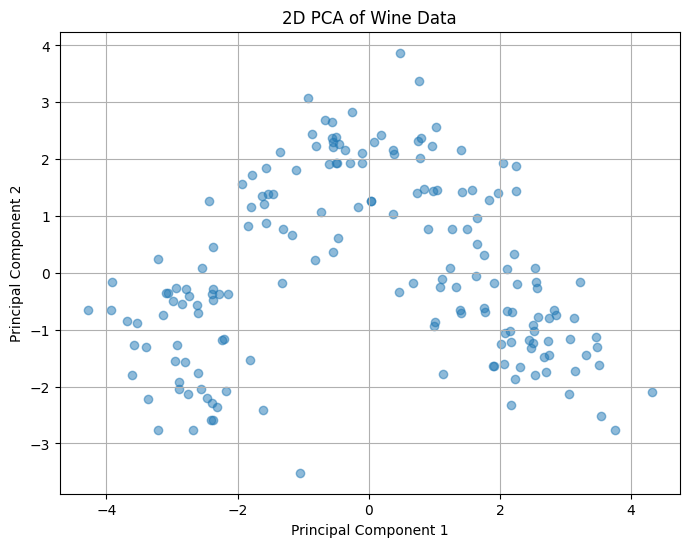

Number of Eigenvalues above one: 3
Variance explained by the first two components: 55.41%


In [3]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

pca = PCA()
pca.fit(data_scaled)

eigenvalues = pca.explained_variance_
num_eigenvalues_above_one = sum(eigenvalues > 1)

variance_explained = sum(pca.explained_variance_ratio_[:2]) * 100


pca_2d = PCA(n_components=2)
data_2d = pca_2d.fit_transform(data_scaled)
plt.figure(figsize=(8, 6))
plt.scatter(data_2d[:, 0], data_2d[:, 1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of Wine Data')
plt.grid(True)
plt.show()

print(f'Number of Eigenvalues above one: {num_eigenvalues_above_one}')
print(f'Variance explained by the first two components: {variance_explained:.2f}%')


# Question 2

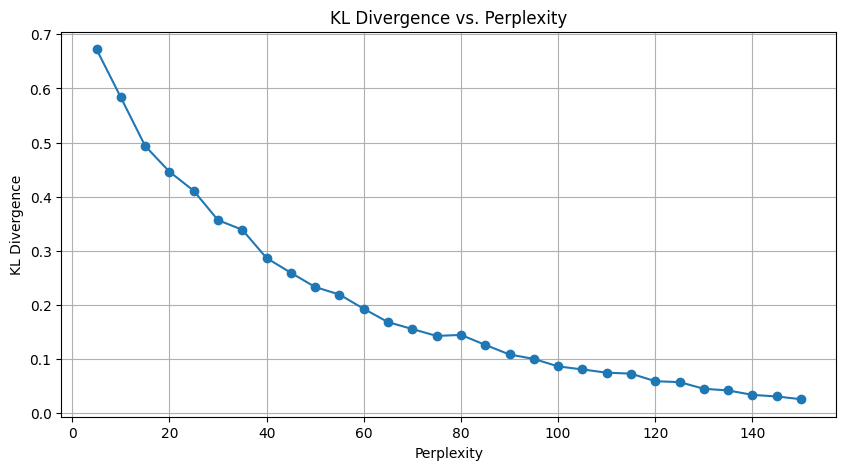

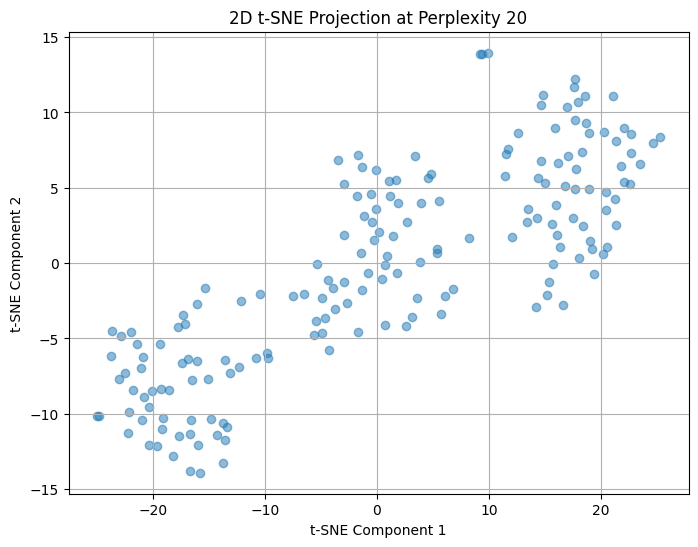

In [4]:
from sklearn.manifold import TSNE

perplexities = range(5, 151, 5)  # Perplexity values from 5 to 150
kl_divergences = []
tsne_results = {}

# Analyze t-SNE with varying perplexity
for perplexity in perplexities:
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    tsne_result = tsne.fit_transform(data_scaled)
    tsne_results[perplexity] = tsne_result
    kl_divergences.append(tsne.kl_divergence_)

# Plot KL-divergence vs Perplexity
plt.figure(figsize=(10, 5))
plt.plot(perplexities, kl_divergences, marker='o')
plt.xlabel('Perplexity')
plt.ylabel('KL Divergence')
plt.title('KL Divergence vs. Perplexity')
plt.grid(True)
plt.show()

# Plot the 2D t-SNE result for Perplexity = 20
tsne_result_20 = tsne_results[20]
plt.figure(figsize=(8, 6))
plt.scatter(tsne_result_20[:, 0], tsne_result_20[:, 1], alpha=0.5)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('2D t-SNE Projection at Perplexity 20')
plt.grid(True)
plt.show()

# Question 3

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


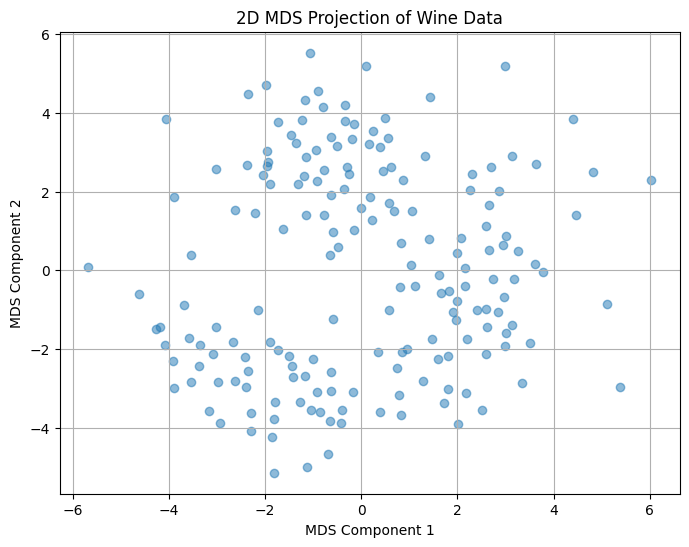

Stress of the MDS embedding: 21906.328266085344


In [11]:
from sklearn.manifold import MDS
mds = MDS(n_components=2, random_state=13)

# Fit MDS to the data
data_2d_mds = mds.fit_transform(data_scaled)

# Retrieve the stress of the embedding
stress_value = mds.stress_

# Plot the 2D MDS solution
plt.figure(figsize=(8, 6))
plt.scatter(data_2d_mds[:, 0], data_2d_mds[:, 1], alpha=0.5)
plt.xlabel('MDS Component 1')
plt.ylabel('MDS Component 2')
plt.title('2D MDS Projection of Wine Data')
plt.grid(True)
plt.show()

print(f'Stress of the MDS embedding: {stress_value}')

# Question 4

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

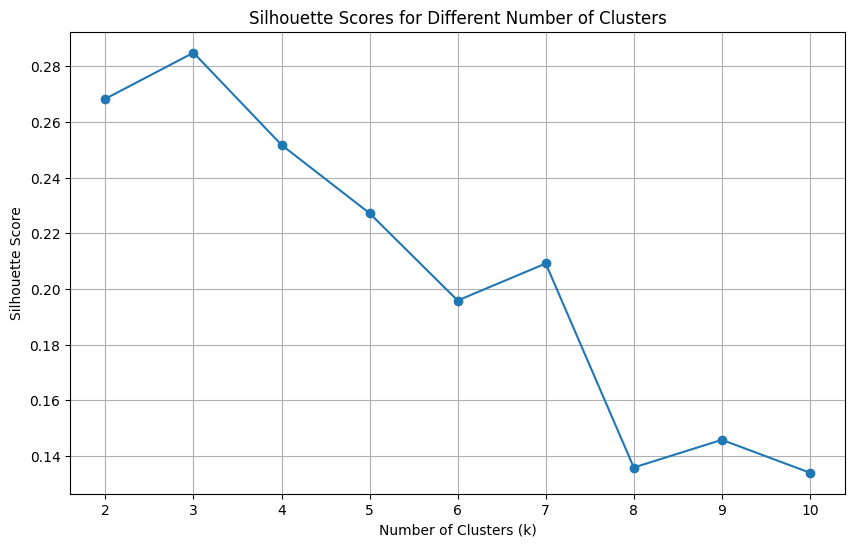

Optimal number of clusters: 3


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


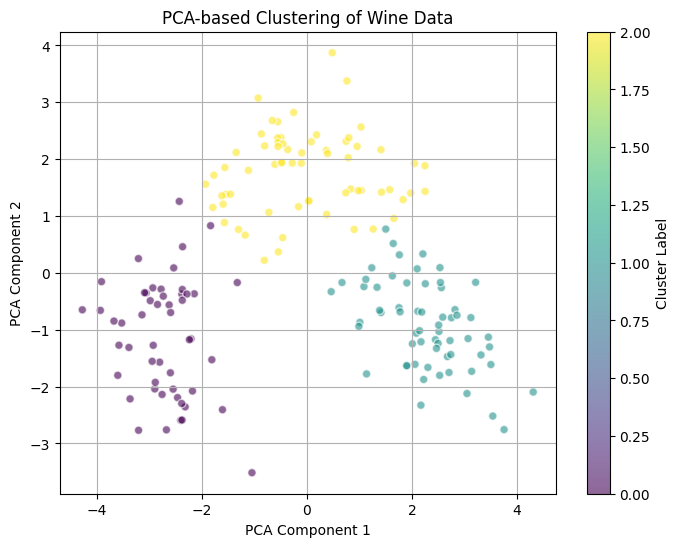

Total sum of distances of points to cluster centers: 1277.9284888446412


In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
data_2d = pca.fit_transform(data_scaled)

# Determine the optimal number of clusters using Silhouette Score
silhouette_scores = []
K_range = range(2, 11)  # Testing for k values from 2 to 10
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(data_2d)
    silhouette_scores.append(silhouette_score(data_2d, cluster_labels))

# Plot Silhouette Scores to find the optimal k
plt.figure(figsize=(10, 6))
plt.plot(K_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Number of Clusters')
plt.grid(True)
plt.show()

# Find the k with the highest silhouette score
optimal_k = K_range[silhouette_scores.index(max(silhouette_scores))]
print(f'Optimal number of clusters: {optimal_k}')

# Apply kMeans with the optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(data_2d)

# Plot the clustered data
plt.figure(figsize=(8, 6))
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=clusters, cmap='viridis', alpha=0.6, edgecolors='w')
plt.colorbar(label='Cluster Label')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA-based Clustering of Wine Data')
plt.grid(True)
plt.show()

# Calculate the total sum of distances of all points to their respective cluster centers
total_distance = kmeans.inertia_
print(f'Total sum of distances of points to cluster centers: {total_distance}')

# Question 5

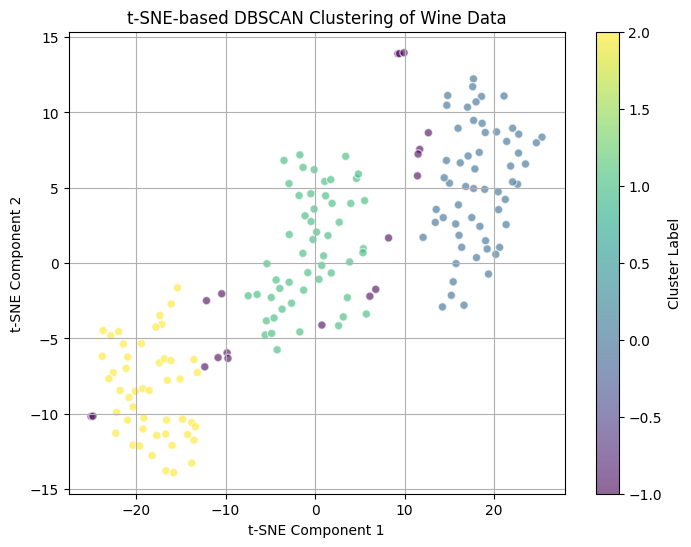

Number of clusters: 3
Number of noise points: 19


In [27]:
tsne = TSNE(n_components=2, perplexity=20, random_state=42)
data_2d_tsne = tsne.fit_transform(data_scaled)

# DBSCAN Clustering
epsilon = 2.5  # Adjusted for t-SNE scale
minPoints = 5  # Generally starts with 2 * dimension

# Apply DBSCAN
dbscan = DBSCAN(eps=epsilon, min_samples=minPoints)
clusters = dbscan.fit_predict(data_2d_tsne)

# Plot the clustered data
plt.figure(figsize=(8, 6))
scatter = plt.scatter(data_2d_tsne[:, 0], data_2d_tsne[:, 1], c=clusters, cmap='viridis', alpha=0.6, edgecolors='w')
plt.colorbar(scatter, label='Cluster Label')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE-based DBSCAN Clustering of Wine Data')
plt.grid(True)
plt.show()

# Check the number of clusters and noise points
n_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
n_noise = list(clusters).count(-1)

print(f'Number of clusters: {n_clusters}')
print(f'Number of noise points: {n_noise}')

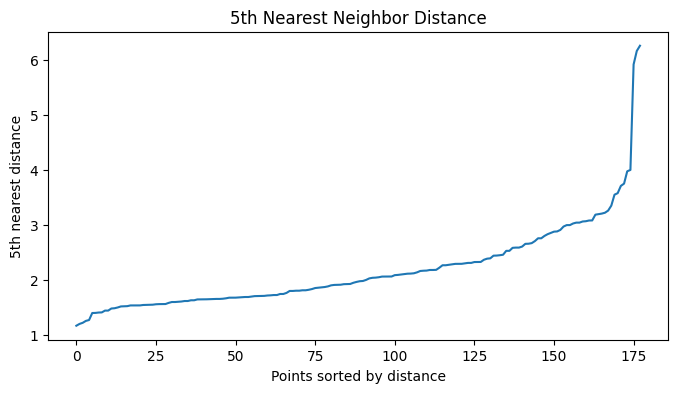

In [26]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Assuming 'data_2d_tsne' is your t-SNE output
neighbors = NearestNeighbors(n_neighbors=5)  # Consider 5 nearest neighbors
neighbors_fit = neighbors.fit(data_2d_tsne)
distances, indices = neighbors_fit.kneighbors(data_2d_tsne)

# Sort and plot distances to the nearest k-th neighbor
sorted_distances = np.sort(distances[:, 4])  # 5th closest point (4 because indexing starts at 0)
plt.figure(figsize=(8, 4))
plt.plot(sorted_distances)
plt.xlabel('Points sorted by distance')
plt.ylabel('5th nearest distance')
plt.title('5th Nearest Neighbor Distance')
plt.show()


# Question A

Both the k-Means and DBSCAN clustering methods applied after dimensionality reduction through PCA and t-SNE, respectively, indicated the presence of three distinct clusters within the wine dataset. This consistency across different methods reinforces the conclusion that there are likely three different kinds of wine represented.

Differences Among the Wine Types:

Chemical Properties: Each of the three clusters likely represents wines grouped by similar chemical properties. These could include measurable factors such as alcohol content, acidity, sugar levels, and phenolic content, which influence the taste, aroma, and color of the wines.
Wine Varietals: It is plausible that each cluster may correspond to different grape varietals or a blend characteristic that is distinct, influencing the cluster formation. Grape varietals can significantly impact the flavor profiles and structural components like tannins, affecting the wine's aging potential and palatability.

# Question B

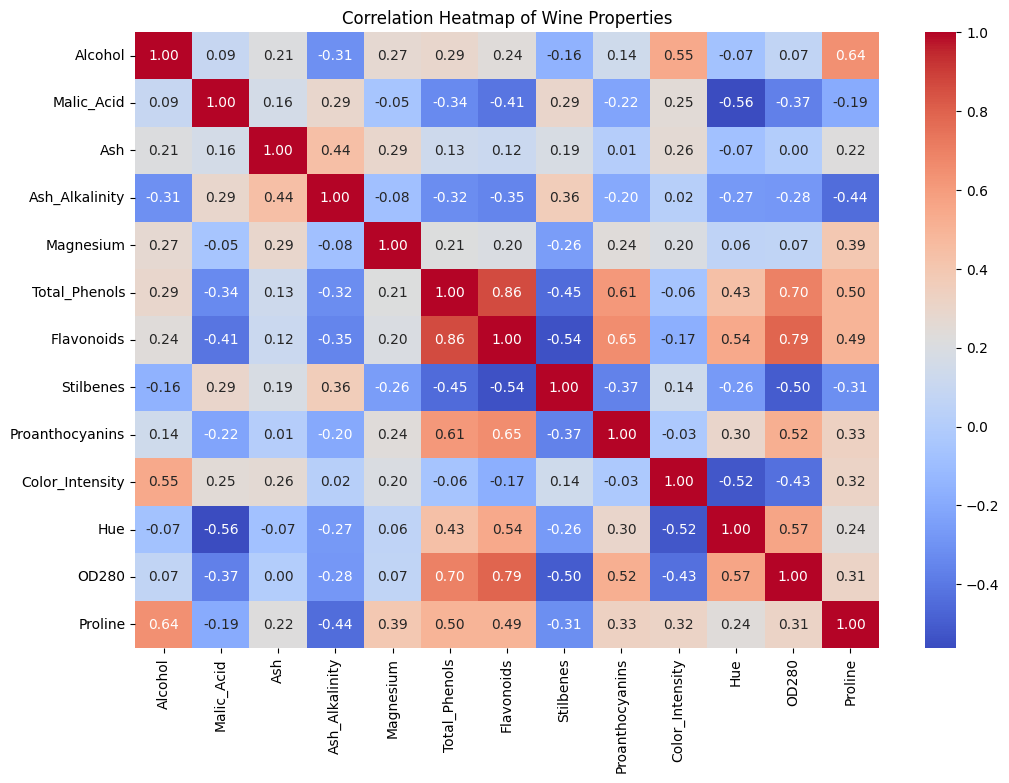

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Standardize the data (optional for correlation but generally good practice for other analyses)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=data.columns)  # convert back to DataFrame to keep column names

# Calculate the correlation matrix
corr_matrix = data_scaled.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap of Wine Properties')
plt.show()


Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alkalinity', 'Magnesium',
       'Total_Phenols', 'Flavonoids', 'Stilbenes', 'Proanthocyanins',
       'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')